# Make 10 class image classification model using Transfer learning (CNN)

In [1]:
# import the lib
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import numpy as np

In [2]:
# set the random seed
tf.random.set_seed(42)

In [3]:
# Import helper function
!wget https://raw.githubusercontent.com/prvpitawala/ML_help/main/helper_functions.py

--2023-09-03 14:48:04--  https://raw.githubusercontent.com/prvpitawala/ML_help/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-03 14:48:04 (94.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Download the data set
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

from helper_functions import unzip_data
unzip_data("10_food_classes_all_data.zip")

--2023-09-03 14:48:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  35.5MB/s    in 5.6s    

2023-09-03 14:48:10 (88.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [5]:
# see inside folders
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'.")

There are 2 directories and 0 image in '10_food_classes_all_data'.
There are 10 directories and 0 image in '10_food_classes_all_data/test'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/ice_cream'.
There are 10 directori

In [6]:
# set up data inputs
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/10_food_classes_all_data/train"
test_dir  = "/content/10_food_classes_all_data/test"



train_data = image_dataset_from_directory(train_dir,
                                          image_size = (224, 224),
                                          batch_size = 32,
                                          label_mode = "categorical")

test_data  = image_dataset_from_directory(test_dir,
                                          image_size = (224, 224),
                                          batch_size =32,
                                          label_mode = "categorical",
                                          shuffle = False) # set shuffle False


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
# get class names
class_names = train_data.class_names

In [8]:
# get the labels
test_labels = []
for images, labels in test_data.unbatch():
  test_labels.append(labels.numpy().argmax())

print(test_labels)
print(len(test_labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

16705208/16705208 [==============================] - 0s 0us/step


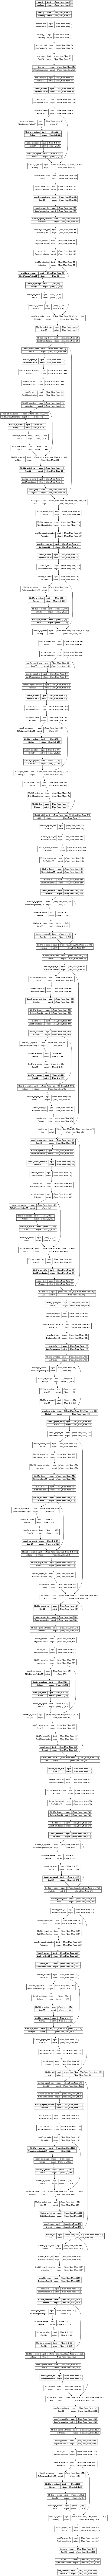

In [9]:
# download the efficientNetB0 as the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# plot the efficientNet model structure
from tensorflow.keras.utils import plot_model
plot_model(base_model, show_shapes=True, dpi=50)

In [10]:
# set the base model layers freez
print("layer details")
for layer in base_model.layers:
    layer.trainable = False

layer details


In [11]:
from tensorflow.keras.layers import Dense, Input, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model


# create the model
inputs = Input(shape =(224, 224, 3))

x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation = "softmax")(x)

model = Model(inputs, x)

# compile the model
model.compile(loss = "categorical_crossentropy",
                     optimizer = "adam",
                     metrics = ["accuracy"])




In [12]:
# get model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


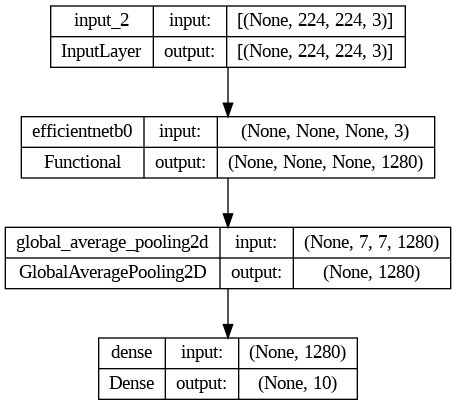

In [13]:
# plot the main model
plot_model(model, show_shapes=True)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# set early stop callback
early_stop = EarlyStopping(monitor = "val_accuracy", patience=2, restore_best_weights = True)

# fit the model
history = model.fit(train_data,
                    epochs = 50,
                    steps_per_epoch=len(train_data),
                    validation_data = test_data,
                    validation_steps = len(test_data),
                    callbacks = [early_stop])

Epoch 1/50
235/235 [==============================] - 42s 114ms/step - loss: 0.8565 - accuracy: 0.7588 - val_loss: 0.4084 - val_accuracy: 0.8884
Epoch 2/50
235/235 [==============================] - 24s 100ms/step - loss: 0.4766 - accuracy: 0.8575 - val_loss: 0.3338 - val_accuracy: 0.9052
Epoch 3/50
235/235 [==============================] - 24s 98ms/step - loss: 0.4025 - accuracy: 0.8805 - val_loss: 0.3030 - val_accuracy: 0.9124
Epoch 4/50
235/235 [==============================] - 23s 96ms/step - loss: 0.3583 - accuracy: 0.8923 - val_loss: 0.2846 - val_accuracy: 0.9152
Epoch 5/50
235/235 [==============================] - 23s 98ms/step - loss: 0.3271 - accuracy: 0.9007 - val_loss: 0.2757 - val_accuracy: 0.9156
Epoch 6/50
235/235 [==============================] - 24s 99ms/step - loss: 0.2975 - accuracy: 0.9107 - val_loss: 0.2710 - val_accuracy: 0.9168
Epoch 7/50
235/235 [==============================] - 24s 99ms/step - loss: 0.2792 - accuracy: 0.9189 - val_loss: 0.2636 - val_accurac

In [15]:
# evaluate the best model using the early stop callback
model.evaluate(test_data)

79/79 [==============================] - 5s 67ms/step - loss: 0.2636 - accuracy: 0.9220


[0.26362845301628113, 0.921999990940094]

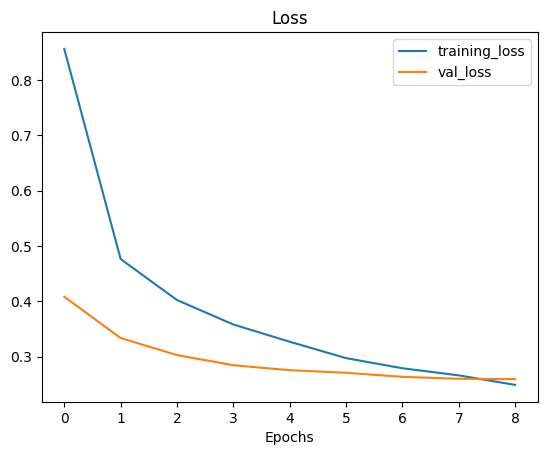

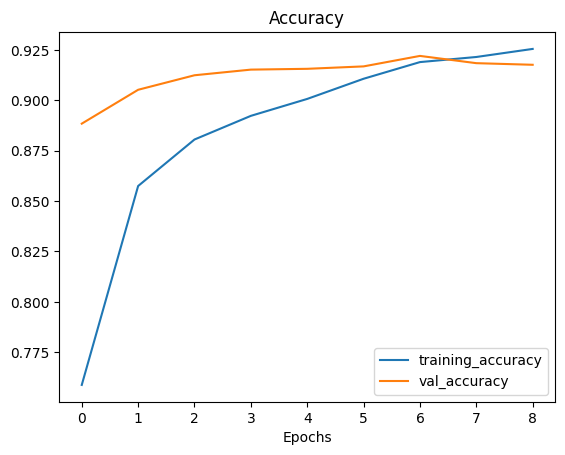

In [16]:
from helper_functions import plot_loss_curves

# plot the loss curve
plot_loss_curves(history)

In [17]:
# get predicted labels
pred = model.predict(test_data)
pred

79/79 [==============================] - 7s 73ms/step


array([[9.5401436e-01, 5.6036451e-04, 4.7985421e-04, ..., 3.4239326e-02,
        8.0840876e-03, 1.6290034e-05],
       [7.6999462e-01, 1.5982281e-02, 2.1171663e-03, ..., 1.6154583e-01,
        2.1010470e-02, 3.5709157e-04],
       [2.8115064e-01, 2.1446310e-03, 2.5455072e-04, ..., 6.3424659e-01,
        4.4895061e-03, 6.2531501e-05],
       ...,
       [4.7178860e-04, 2.2171349e-03, 9.2044508e-04, ..., 4.3390519e-05,
        3.5510049e-05, 9.9055988e-01],
       [7.0632605e-06, 2.0056217e-07, 6.9867856e-06, ..., 5.1507965e-07,
        2.6995984e-05, 9.9146175e-01],
       [3.2272081e-05, 1.9159563e-05, 3.6191304e-05, ..., 1.2706790e-05,
        4.3951684e-05, 9.8893470e-01]], dtype=float32)

In [18]:
pred_labels = np.argmax(pred, axis = 1)
pred_labels

array([0, 0, 7, ..., 9, 9, 9])

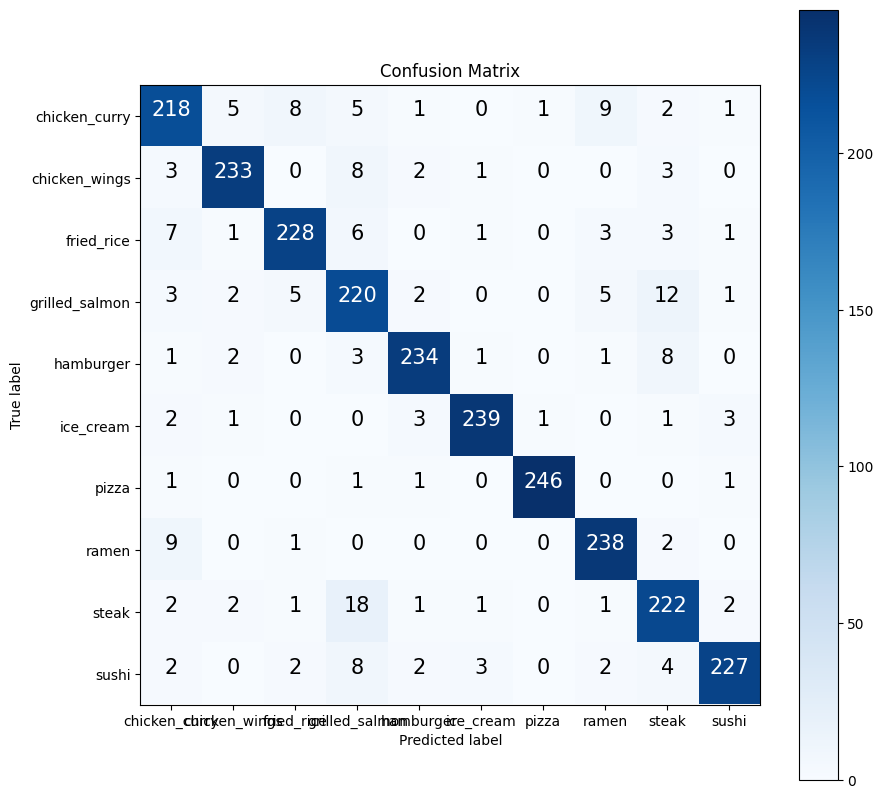

In [19]:
# plot the confusion metrix
from helper_functions import make_confusion_matrix
make_confusion_matrix(test_labels, pred_labels, classes= class_names)

end